In [9]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import json

In [10]:
# Import annual data as DataFrame
annual_milk_production = pd.read_csv("Resources/us_annual_milk_production_16-18.csv")
annual_milk_production.head()

,Milk Production,2016,2017,2018
0,Production (23 States) (Mil. lb.),"199,434","202,455","204,825"
1,Milk cows (23 States) (Thou.),"8,653","8,725","8,734"
2,Milk per cow (23 States) (Lb.),"23,049","23,204","23,451"
3,Production (U.S. estimate) (Mil. Lb.),"212,405","215,466","217,476"


In [11]:
reset_milk_production = annual_milk_production.set_index('Milk Production')
reset_milk_production

,2016,2017,2018
Milk Production,,,
Production (23 States) (Mil. lb.),"199,434","202,455","204,825"
Milk cows (23 States) (Thou.),"8,653","8,725","8,734"
Milk per cow (23 States) (Lb.),"23,049","23,204","23,451"
Production (U.S. estimate) (Mil. Lb.),"212,405","215,466","217,476"


In [13]:
transpose_milk_production = reset_milk_production.transpose()
transpose_milk_production

Milk Production,Production (23 States) (Mil. lb.),Milk cows (23 States) (Thou.),Milk per cow (23 States) (Lb.),Production (U.S. estimate) (Mil. Lb.)
2016,"199,434","8,653","23,049","212,405"
2017,"202,455","8,725","23,204","215,466"
2018,"204,825","8,734","23,451","217,476"


In [14]:
annual_milk_price = pd.read_csv("Resources/us_annual_milk_price_16-18.csv")
annual_milk_price.head()

,Milk Price,2016,2017,2018
0,All milk (Dol./cwt),16.30,17.60,16.20
1,Class III (cheese milk) 3.5% fat (Dol./cwt),14.87,16.17,14.61
2,Class IV (butter-powder milk) 3.5% fat (Dol./cwt),13.77,15.16,14.23


In [15]:
reset_milk_price = annual_milk_price.set_index('Milk Price')
reset_milk_price

,2016,2017,2018
Milk Price,,,
All milk (Dol./cwt),16.30,17.60,16.20
Class III (cheese milk) 3.5% fat (Dol./cwt),14.87,16.17,14.61
Class IV (butter-powder milk) 3.5% fat (Dol./cwt),13.77,15.16,14.23


In [16]:
transpose_milk_price = reset_milk_price.transpose()
transpose_milk_price

Milk Price,All milk (Dol./cwt),Class III (cheese milk) 3.5% fat (Dol./cwt),Class IV (butter-powder milk) 3.5% fat (Dol./cwt)
2016,16.3,14.87,13.77
2017,17.6,16.17,15.16
2018,16.2,14.61,14.23


In [23]:
#Index(['All milk (Dol./cwt)', 'Class III (cheese milk) 3.5% fat (Dol./cwt)',
       ##dtype='object', name='Milk Price')

In [19]:
merge_production_price = transpose_milk_production.merge(transpose_milk_price, on=transpose_milk_production.index)
merge_production_price

,key_0,Production (23 States) (Mil. lb.),Milk cows (23 States) (Thou.),Milk per cow (23 States) (Lb.),Production (U.S. estimate) (Mil. Lb.),All milk (Dol./cwt),Class III (cheese milk) 3.5% fat (Dol./cwt),Class IV (butter-powder milk) 3.5% fat (Dol./cwt)
0,2016,"199,434","8,653","23,049","212,405",16.3,14.87,13.77
1,2017,"202,455","8,725","23,204","215,466",17.6,16.17,15.16
2,2018,"204,825","8,734","23,451","217,476",16.2,14.61,14.23


In [20]:
reset_merge = merge_production_price.set_index('key_0')
reset_merge

,Production (23 States) (Mil. lb.),Milk cows (23 States) (Thou.),Milk per cow (23 States) (Lb.),Production (U.S. estimate) (Mil. Lb.),All milk (Dol./cwt),Class III (cheese milk) 3.5% fat (Dol./cwt),Class IV (butter-powder milk) 3.5% fat (Dol./cwt)
key_0,,,,,,,
2016,"199,434","8,653","23,049","212,405",16.3,14.87,13.77
2017,"202,455","8,725","23,204","215,466",17.6,16.17,15.16
2018,"204,825","8,734","23,451","217,476",16.2,14.61,14.23


In [21]:
renamed_milk_price_production = reset_merge.rename_axis('Year')
renamed_milk_price_production

,Production (23 States) (Mil. lb.),Milk cows (23 States) (Thou.),Milk per cow (23 States) (Lb.),Production (U.S. estimate) (Mil. Lb.),All milk (Dol./cwt),Class III (cheese milk) 3.5% fat (Dol./cwt),Class IV (butter-powder milk) 3.5% fat (Dol./cwt)
Year,,,,,,,
2016,"199,434","8,653","23,049","212,405",16.3,14.87,13.77
2017,"202,455","8,725","23,204","215,466",17.6,16.17,15.16
2018,"204,825","8,734","23,451","217,476",16.2,14.61,14.23


In [24]:
renamed_milk_price_production, = plt.plot(All milk (Dol./cwt), Class III (cheese milk) 3.5% fat (Dol./cwt),Class IV (butter-powder milk) 3.5% fat (Dol./cwt), color="blue", label="World Average" )


SyntaxError: invalid syntax (<ipython-input-24-b282ed420d1b>, line 1)

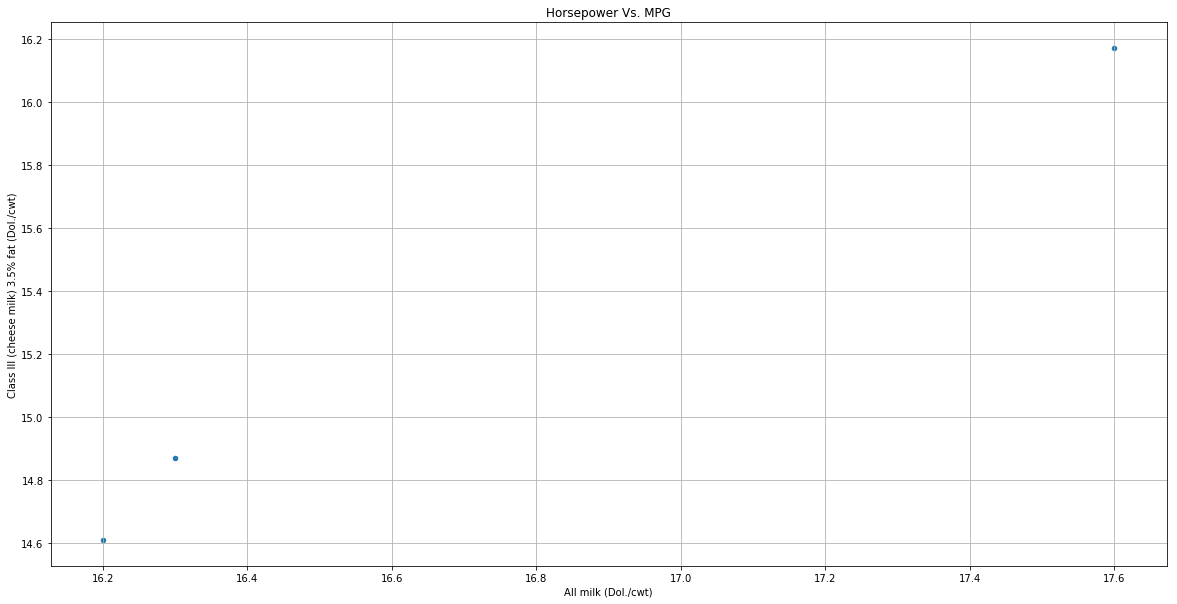

In [25]:
renamed_milk_price_production.plot(kind="scatter", x="All milk (Dol./cwt)", y="Class III (cheese milk) 3.5% fat (Dol./cwt)", grid=True, figsize=(20,10),
              title="Horsepower Vs. MPG")
plt.show()


In [26]:
time_series_analysis = pd.read_csv("Resources/us_annual_milk_production_factors_80-18.csv")
time_series_analysis.head()

,Year,Milk cows and heifers that have calved (thousand),"Replace-ment heifers, 500+ lbs. (thousand)",Replace-ments per 100 cows (thousand),Average number of milk cows in the U.S. (thousand),Milk per cow (pounds),Milk production (million pounds),Average price paid for milk (dollars per cwt),Dairy ration value (dollars per cwt),Milk-feed ratio,Milk Cow Price (dollars per head),"Milk Cow Cost, Milk volume required to buy a cow (pounds)",Alfalfa hay price received by farmers (dollars per ton),Slaughter cow price (dollars per cwt)
0,1980.0,"10,758","4,159",38.7,"10,799","11,891","128,406",13.0,4.84,2.72,"1,190","9,154",72.00,45.73
1,1981.0,"10,849","4,342",40.0,"10,898","12,183","132,770",13.8,5.04,2.76,"1,200","8,696",70.90,41.93
2,1982.0,"10,986","4,547",41.4,"11,011","12,306","135,505",13.6,4.42,3.09,"1,110","8,162",72.73,39.96
3,1983.0,"11,047","4,545",41.1,"11,059","12,622","139,588",13.6,5.24,2.61,"1,030","7,574",78.70,39.35
4,1984.0,"11,059","4,533",41.0,"10,793","12,541","135,351",13.5,5.34,2.54,895,"6,630",79.48,39.81


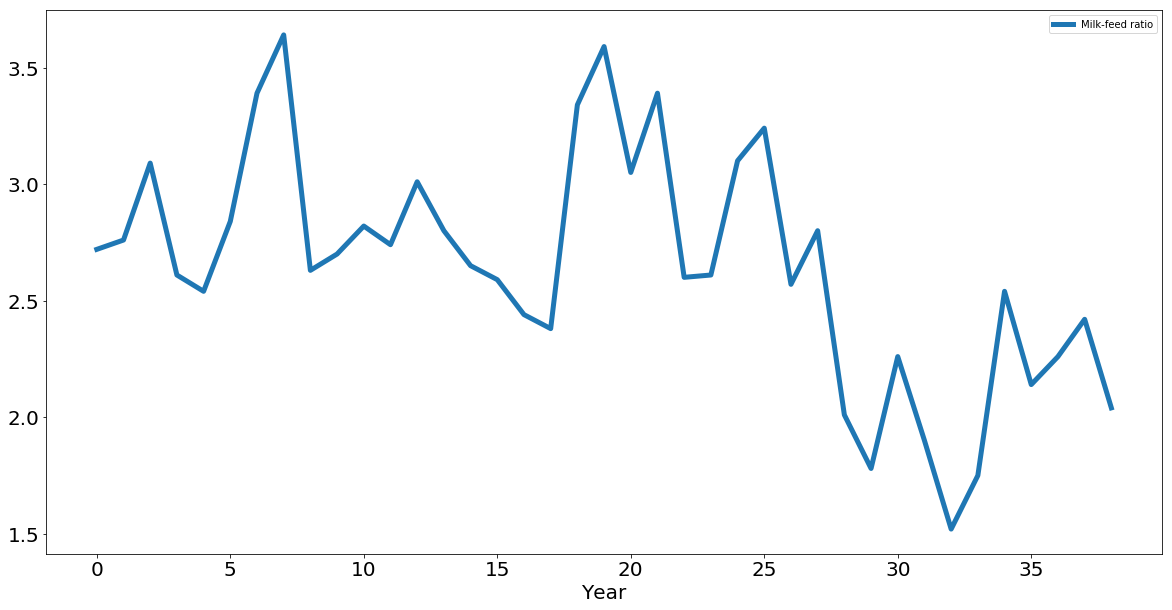

In [33]:
time_analysis=time_series_analysis[['Milk-feed ratio']]
time_analysis.plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);